In [1]:
from fastai.vision import *

In [2]:
path = Path('rubbish-classfication/dataset-resized/')

In [3]:
path.ls()

[PosixPath('rubbish-classfication/dataset-resized/cardboard'),
 PosixPath('rubbish-classfication/dataset-resized/models'),
 PosixPath('rubbish-classfication/dataset-resized/glass'),
 PosixPath('rubbish-classfication/dataset-resized/trash'),
 PosixPath('rubbish-classfication/dataset-resized/metal'),
 PosixPath('rubbish-classfication/dataset-resized/plastic'),
 PosixPath('rubbish-classfication/dataset-resized/paper')]

In [4]:
classes = ['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']

In [5]:
np.random.seed(42)

In [9]:
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
                                 ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [10]:
data.classes

['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']

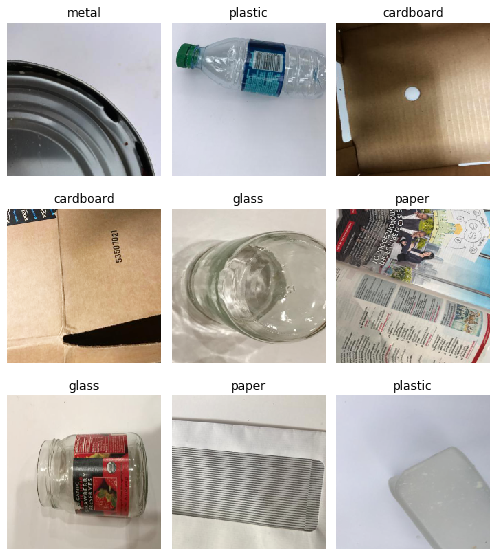

In [12]:
data.show_batch(rows=3, figsize=(7,8))

In [11]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash'], 6, 2022, 505)

### Train model

In [30]:
acc_02 = partial(accuracy_thresh, thresh=0.2)
f_score = partial(fbeta, thresh=0.2, beta = 1)
# learn = create_cnn(data, arch, metrics=[acc_02, f_score])
learn = cnn_learner(data, models.resnet34, metrics=[acc_02,f_score])

In [24]:
# learn.destroy() 
# torch.cuda.empty_cache() 

In [36]:
lr=1e-3
learn.fit_one_cycle(10, slice(1e-4,lr/2))

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.726534,0.436786,0.827723,0.172277,00:33
1,0.580310,0.395987,0.865347,0.134653,00:26
2,0.462047,0.461142,0.865347,0.134653,00:27
3,0.369332,0.575560,0.857426,0.142574,00:26
4,0.316710,0.473200,0.877228,0.122772,00:27
5,0.219740,0.374638,0.918812,0.081188,00:27
6,0.156363,0.312416,0.916832,0.083168,00:27
7,0.113492,0.288073,0.932673,0.067327,00:27
8,0.083621,0.277059,0.938614,0.061386,00:28
9,0.059190,0.276022,0.936634,0.063366,01:38


In [32]:
learn.save('stage-2')

In [33]:
learn.unfreeze()

In [34]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


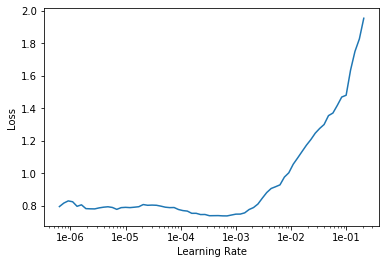

In [35]:
learn.recorder.plot()

In [40]:
learn.load('stage-2');

In [41]:
interp = ClassificationInterpretation.from_learner(learn)

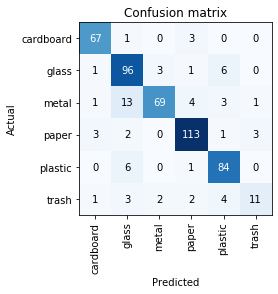

In [42]:
interp.plot_confusion_matrix()